In [1]:
import numpy as np
from csv import reader
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from data.fashion_mnist_master.utils import mnist_reader

In [2]:
def load_csv(filename):
    dataset = list()
    data=list()
    lables=list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    dataset.pop(0)
    for rows in dataset:
        lab=rows[0]
        rows.remove(lab)
        lables.append(lab)
        rows = [float(i) for i in rows]
        data.append(rows)
    return data,lables

In [3]:
def classData(data,lables):
    Cdata={}
    for j in classes:
        Cdata[j]=list()
    for i in range(len(lables)):
        Cdata[lables[i]].append(data[i])
    return Cdata

In [4]:
def means(data,lables):
    dat=np.array(data)
    sums={}
    num={}
    for j in classes:
        sums[j]=np.array([0]*dim)
        num[j]=0
    for i in range(len(lables)):
#         print(sums[lables[i]])
        sums[lables[i]]=sums[lables[i]]+dat[i]
        num[lables[i]]=num[lables[i]]+1
    means={}
    for lab in sums:
        means[lab]=sums[lab]/num[lab]
    Cmeans=means
    return Cmeans

In [5]:
def mean(data):
    dat=np.array(data)
    num=0
    sums=np.array([0]*dim)
    for i in range (len(dat)):
        sums=sums+dat[i]
        num+=1
    return np.array(sums/num)

In [6]:
def CSb(Cdata,Cmeans,mean):
    mean=np.array(mean)
    S_B={}
    for j in Cmeans.keys():
        S_B[j] = np.zeros((dim,dim))         
    for i in Cmeans.keys():  
        S_B[i] += len(Cdata[i])*np.outer((Cmeans[i] - mean),(Cmeans[i] - mean))
    return S_B

In [7]:
def Sb(Cdata,Cmeans,mean):
    mean=np.array(mean)
    S_B = np.zeros((dim,dim))         
    for i in Cmeans.keys():  
        S_B += len(Cdata[i])*np.outer((Cmeans[i] - mean),(Cmeans[i] - mean))
    return S_B

In [22]:
def Sw(Cdata,Cmeans):
    S_W=np.zeros((dim,dim))
    for i in Cmeans.keys():
        print(i , ' is started')
        for row in Cdata[i]:
            S_W+=np.outer((row-Cmeans[i]),(row-Cmeans[i]))
        print(i , ' has ended')
    return S_W


In [9]:
def Ceigen(CSb,Sw):
    mat={}
    eigvals={}
    eigvecs={}
    eig={}
    for k in classes:
        mat[k] = np.dot(np.linalg.pinv(Sw), CSb[k])         
        eigvals[k], eigvecs[k] = np.linalg.eig(mat[k])         
        eig[k] = [(eigvals[k][i], eigvecs[k][:, i]) for i in range(len(eigvals[k]))]
        eig[k] = sorted(eig[k], key = lambda x : x[0], reverse = True) 
    return eig

In [10]:
def eigen(Sb,Sw):
    mat = np.dot(np.linalg.pinv(Sw), Sb)         
    eigvals, eigvecs = np.linalg.eig(mat)         
    eig = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
    eig = sorted(eig, key = lambda x : x[0], reverse = True) 
    return eig

In [11]:
def projData(w,x):
    x=np.array(x)
    w=np.array(w)
    return (np.dot(x,w.T))

----------------------Test------------------

In [12]:
X_train, y_train = mnist_reader.load_mnist('data/fashion_mnist_master/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion_mnist_master/data/fashion', kind='t10k')

In [13]:
classes=list(set(y_train))
numC=len(classes)
dim=X_train.shape[1]

In [14]:
Cmeans=means(X_train,y_train)

In [15]:
Mean=mean(X_train)

In [16]:
Cdata=classData(X_train,y_train)

In [17]:
S_b=Sb(Cdata,Cmeans,Mean)

In [23]:
S_w=Sw(Cdata,Cmeans)

0  is started
0  has ended
1  is started
1  has ended
2  is started
2  has ended
3  is started
3  has ended
4  is started
4  has ended
5  is started
5  has ended
6  is started
6  has ended
7  is started
7  has ended
8  is started
8  has ended
9  is started
9  has ended


In [24]:
Eg=eigen(S_b,S_w)

In [67]:
w=np.array([Eg[0][1],Eg[1][1],Eg[2][1],Eg[3][1]])

In [68]:
Pdata=projData(w,X_train)

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show(*args, **kw)>

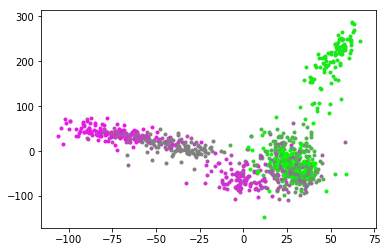

In [55]:
for i in range(1000):
    plt.scatter(Pdata[i][0],Pdata[i][1],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
plt.show

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show(*args, **kw)>

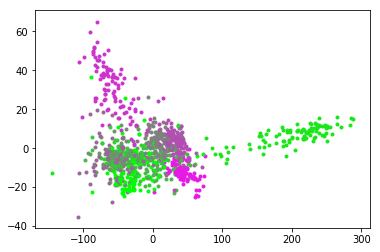

In [56]:
for i in range(1000):
    plt.scatter(Pdata[i][1],Pdata[i][2],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
plt.show

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show(*args, **kw)>

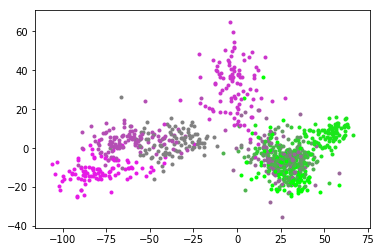

In [57]:
for i in range(1000):
    plt.scatter(Pdata[i][0],Pdata[i][2],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
plt.show

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


<function matplotlib.pyplot.show(*args, **kw)>

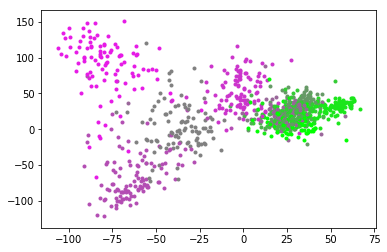

In [58]:
for i in range(1000):
    plt.scatter(Pdata[i][0],Pdata[i][3],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
plt.show

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


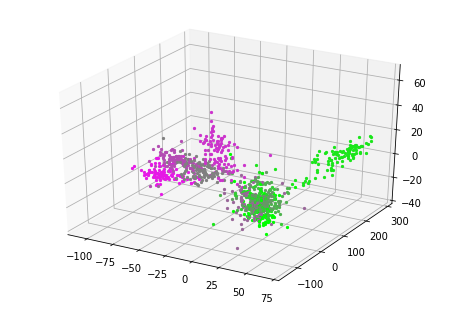

In [66]:
fig = plt.figure()
ax = Axes3D(fig)
# ax = fig.add_subplot( projection='3d')
# ax.scatter(float(rows[1]),float(rows[2]),float(rows[3]),c='g')
for i in range(1000):
    ax.scatter(Pdata[i][0],Pdata[i][1],Pdata[i][2],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')  

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


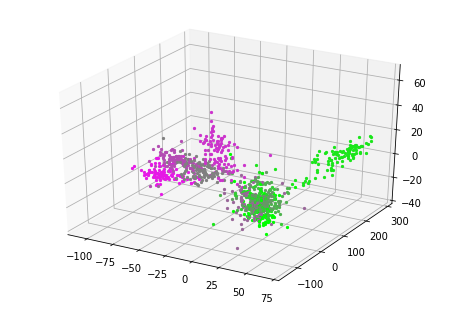

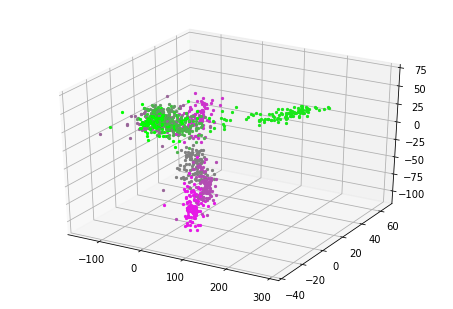

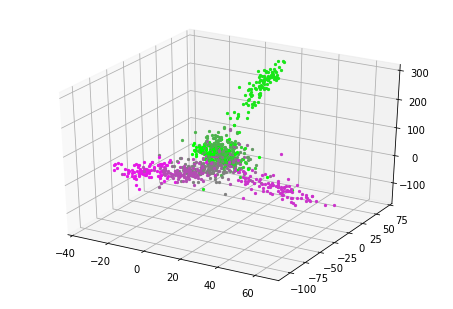

In [78]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = Axes3D(fig1)
ax2 = Axes3D(fig2)
ax3 = Axes3D(fig3)
# ax = fig.add_subplot( projection='3d')
# ax.scatter(float(rows[1]),float(rows[2]),float(rows[3]),c='g')
for i in range(1000):
    ax1.scatter(Pdata[i][0],Pdata[i][1],Pdata[i][2],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')  
    ax2.scatter(Pdata[i][1],Pdata[i][2],Pdata[i][0],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
    ax3.scatter(Pdata[i][2],Pdata[i][0],Pdata[i][1],c=[y_train[i]/10,1-y_train[i]/10,y_train[i]/10],marker='.')
# ax1.plot
# ax2.plot
# ax3.plot